# __<div align="center">EDP : TP1</div>__

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### __1. Construction et visualisation du maillage et de la condition initiale__

In [3]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m
u0 = np

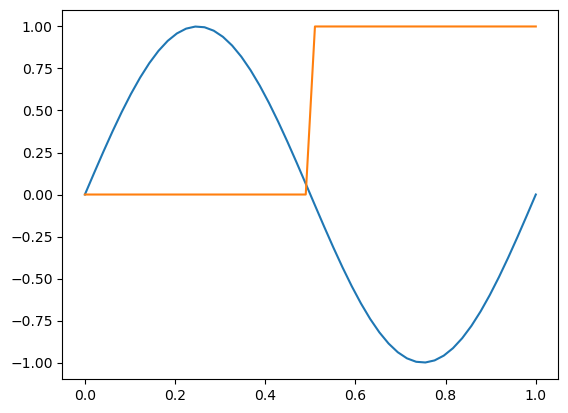

In [4]:
abscisse = np.linspace(0,L,m)

def CI1(beta,L,x):
    return np.sin((2*beta*np.pi*x)/L)

def CI2(x,x0):
    return x > x0

beta = 1
u01 = np.vectorize(CI1)(beta,L,abscisse)

u02 = np.vectorize(CI2)(abscisse,x0)

plt.plot(abscisse,u01)
plt.plot(abscisse,u02)

### __2. Etude du comportement de schémas différences finies__

#### __2.1. Paramètres physiques et numériques__

In [5]:
# Constante

a = 1       # a = 1m/s
C = 0.5     # C "rond", a*dt/dx

#### __2.2. Méthodologie__

Ici lire 2.2 du sujet

In [33]:
liste_beta = [2**i for i in range(1,5)]                         # crée [2,4,8,16]

T = 1
deltax = L/m
deltaT = C*deltax/a
p = int(T/deltaT)

indTviz = [int(np.floor(p/2**i)) for i in range(3,-1,-1)]       # indices pour lesquels on va visualiser les solutions pour le point 3

temps = np.linspace(0,T,p)

#### __2.3. Schémas numériques à implémenter__

Ici lire 2.3 du sujet

### __3. Implémentation des schémas__

#### __3.1. Schéma FOU-EE__

In [31]:
def FOUEE_u_i_nplus1(u_i_n,u_imoinsun_n,C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

##### __3.1.3 Pour CI2__

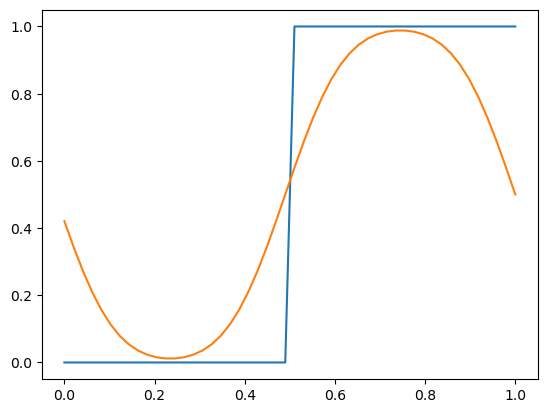

In [32]:
grille_temps_espace = np.zeros((m,p))
grille_temps_espace[:,0] = u02
for n in range(1,p) :
    for i in range(m) :
        grille_temps_espace[i,n] = FOUEE_u_i_nplus1(grille_temps_espace[i,n - 1], grille_temps_espace[i - 1,n - 1], C)

# On doit encore visualiser nos solution à différents temps (indTviz)

plt.plot(abscisse, grille_temps_espace[:,0])

plt.plot(abscisse, grille_temps_espace[:,-1])